In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Number of samples: 49674
     marker      time  dt_micro  device_timestamp  current0  voltage0  \
3491      S  0.250265       736               332  0.790268   20.2385   
3492      S  0.250286        20               382  0.790268   20.1658   
3493      S  0.250304        18               432  0.870914   20.1295   
3494      S  0.250324        19               482  0.817151   20.1295   
3495      S  0.250342        17               533  0.682742   20.1295   

       power0  power_total  
3491  15.9938      15.9938  
3492  15.9364      15.9364  
3493  17.5311      17.5311  
3494  16.4488      16.4488  
3495  13.7433      13.7433  


/usr/lib/python3/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


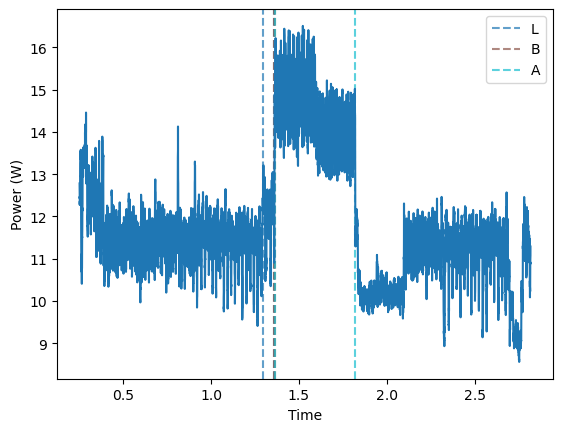

In [47]:
# print(df.head())
df = pd.read_csv('../runtime/benchmark_dump.txt', sep=' ')

# Drop first 200 ms and after 500 ms
# df = df[df['time'] < 0.500 ]
df = df[df['time'] > 0.250 ]

samples = df[df['marker'] == 'S']
markers = df[df['marker'] != 'S']
# smoothen the power values
samples.loc[:, 'power0_smooth'] = samples['power0'].rolling(window=50, center=True).mean()
# print len of samples
print(f"Number of samples: {len(samples)}")



plt.xlabel('Time')
plt.ylabel('Power (W)')

print(df.head())

# Generate unique colors for each marker type
unique_markers = markers['marker'].unique()
colors = cm.get_cmap('tab10', len(unique_markers))  # Use a colormap with enough colors

# Plot vertical lines by marker type
for idx, marker_type in enumerate(unique_markers):
    group = markers[markers['marker'] == marker_type]
    for _, m in group.iterrows():
        plt.axvline(x=m['time'], color=colors(idx), linestyle='--', alpha=0.7, label=marker_type if _ == group.index[0] else "")


plt.plot(samples['time'], samples['power0_smooth'])

plt.legend()